# Amplitude Modulation DSB-SC

## Objective

This experiment aims:

1. To study and practice the generation and demodulation of AM DSB-SC wave.

2. To study the Balanced Modulator.


## Introduction

Double-sideband suppressed carrier is an amplitude modulation without transmitting the carrier thus having a 100% modulation efficiency. DSB-SC can be generated easily by a multiplication operation between the carrier and the message using a mixer. However, Envelope detector cannot be used in the demodulation anymore, WHY? Alternatively, A coherent detection must be used (A mixer) followed by a LPF, WHY?
DSB-SC is used in analog TV systems and radio data systems.

## Procedure

### Generation of DSB-SC




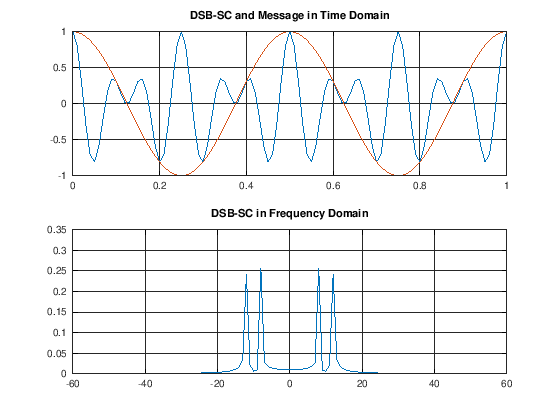

In [25]:
clear all;
warning ("off")

fs  = 1e2;               % sampling frequency
t   =  0 : 1/fs : 1;     % time vector
f   = -fs/2 : 1 : fs/2;  % frequency vector
fc  = 10;                % carrier frequency
fm  = 2;                 % message frequency
m   = cos(2*pi*fm*t);    % message signal
c   = cos(2*pi*fc*t);    % carrier signal
s   = m.*c;              % DSB-SC signal
S   = sig_spec(s);

figure();
subplot(211); plot(t,s); grid on; title('DSB-SC and Message in Time Domain')
hold on;
subplot(211); plot(t,m); grid on;
subplot(212); plot(f,S); grid on; title('DSB-SC in Frequency Domain')

### Demodulation of DSB-SC



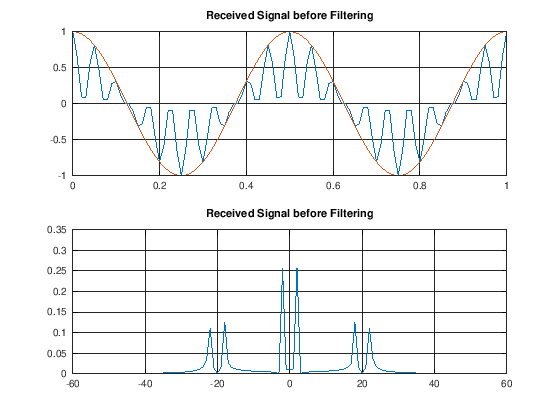

In [26]:
% Demodulation
lo   = cos(2*pi*fc*t);
r   = lo.*s;
R   = sig_spec(r);

figure();
subplot(211); plot(t,r); grid on; title('Received Signal before Filtering')
hold on;
subplot(211); plot(t,m); grid on;
subplot(212); plot(f,R); grid on; title('Received Signal before Filtering')

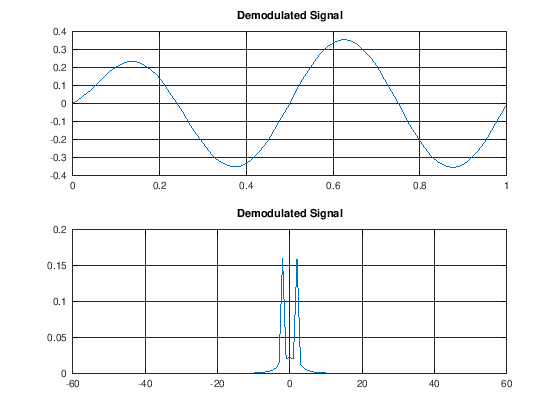

In [27]:
% low pass filtering after the mixer
pkg load signal;
[b a]  = butter(2,fm/(fs/2));
mr     = filter(b,a,r);
Mr   = sig_spec(mr);

figure();
subplot(211); plot(t,mr); grid on; title('Demodulated Signal')
subplot(212); plot(f,Mr); grid on; title('Demodulated Signal')

### Affect of Phase and Frequency Error in Demodulation

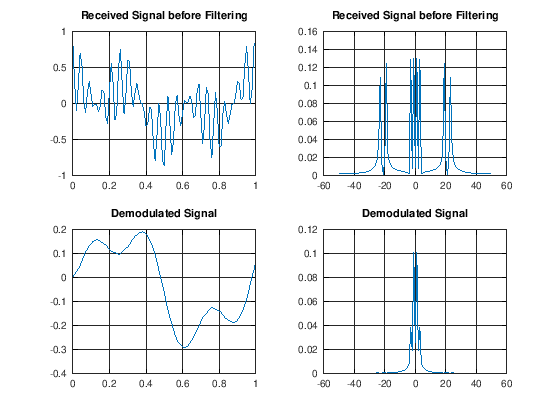

In [28]:
% local oscillator with phase and frequency errors 
phi = pi/6;    % phase diviation of pi/6
df  = 1;       % frequency error of 1 Hz
lo  = cos(2*pi*(fc+df)*t+phi);

% Demodulation
r   = lo.*s;
R   = sig_spec(r);
mr  = filter(b,a,r);
Mr  = sig_spec(mr);

figure();
subplot(221); plot(t,r); grid on; title('Received Signal before Filtering')
subplot(222); plot(f,R); grid on; title('Received Signal before Filtering')
subplot(223); plot(t,mr); grid on; title('Demodulated Signal')
subplot(224); plot(f,Mr); grid on; title('Demodulated Signal')

### Balanced Modulator

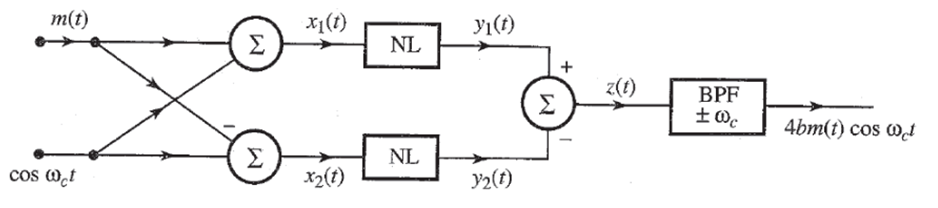

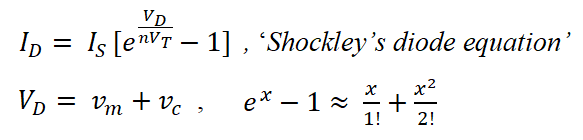



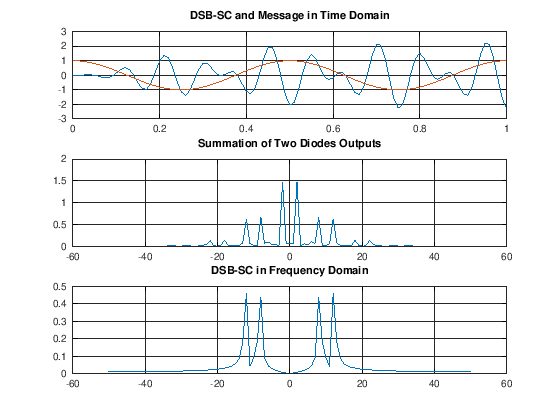

In [29]:
% Balanced Modulator using a Diode as Non-linear Device

fs  = 1e2;               % sampling frequency
t   =  0 : 1/fs : 1;     % time vector
f   = -fs/2 : 1 : fs/2;  % frequency vector
fc  = 10;                % carrier frequency
fm  = 2;                 % message frequency
m   = cos(2*pi*fm*t);    % message signal
c   = cos(2*pi*fc*t);    % carrier signal

y1   = exp(m+c);         % output of diode 1
y2   = exp(-m+c);        % output of diode 2

z   = y1 - y2;
Z   = sig_spec(z);

[b a] = butter(5, [0.15 0.25]); % bandpass filter fc1 = 7.5 Hz and fc2 = 12.5 Hz
s2   = filter(b,a,z);           % DSB-SC signal
S2   = sig_spec(s2);

figure();
subplot(311); plot(t,s2); grid on; title('DSB-SC and Message in Time Domain')
hold on;
subplot(311); plot(t,m); grid on;
subplot(312); plot(f,Z); grid on; title('Summation of Two Diodes Outputs')
subplot(313); plot(f,S2); grid on; title('DSB-SC in Frequency Domain')

### Example

You have three audio files of a woman counts from zero to two.

These files are combined in one variable and then modulated using AM DSB-SC.

In demodulation, the local oscillator used is not synchronized with the modulated carrier. There are 50Hz and pi/2 synch errors.

Listen to the demodulated audio to examine the affect of such an issue.

In [30]:
clear all;

% import audio files 
[y0, fs] = audioread('0.wav');
[y1, fs] = audioread('1.wav');
[y2, fs] = audioread('2.wav');

y   =  [y0' y1' y2'];  % combine three clips in one audio vector

% modulation
n   =  length(y);
t   =  [1 : n]/fs;     % time vector
fc  =  5e3;            % carrier frequency
c   =  cos(2*pi*fc*t); % carrier signal
s   =  y.*c;           % DSB-SC modulated signal

% demodulation
lo     =  cos(2*pi*(fc+50)*t+pi/2); % demodulation carrier with 50Hz and pi/2 synch errors
r      =  lo.*s;
fm     =  1e3;                      % cutoff frequency for LPF in receiver
[b a]  = butter(3, fm / (fs/2) );
mr     = filter( b, a, r);          % high frequencies suppression

audiowrite('TrRec.wav',[y mr],fs);  % export audio vectors to a WAV file

<audio controls="" autoplay="" name="media"><source src="TrRec.wav" type="audio/wav"></audio>

---

## Discussion
- Comment on each point and try to explain what really happened.
